<a href="https://colab.research.google.com/github/ZohebAbai/Tiny-ImageNet-Challenge/blob/master/TinyImageNet_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Nishad Rajmalwar,
Batch: 7,
Email: nrajmalwar@gmail.com

#Model Architecture Builder Code

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.models import load_model
from keras.callbacks import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

# Hyperparameters

# number of classes
num_classes = 200
# input image dimensions
img_height, img_width = 32, 32
# The images are RGB.
img_channels = 3

Using TensorFlow backend.


In [0]:
def space_to_depth_x2(x):
    import tensorflow as tf
    return tf.space_to_depth(x, block_size=2)

In [0]:
input = Input(shape=(None, None, img_channels))

# Block 1

layer1 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
layer1 = BatchNormalization(name='norm_1')(layer1)
layer1 = Activation("relu")(layer1)

layer2 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(layer1)
layer2 = BatchNormalization(name='norm_2')(layer2)
layer2 = Activation("relu")(layer2)

layer3 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(layer2)
layer3 = BatchNormalization(name='norm_3')(layer3)
layer3 = Activation("relu")(layer3)

layer4 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(layer3)
layer4 = BatchNormalization(name='norm_4')(layer4)
layer4 = Activation("relu")(layer4)

layer5 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(layer4)
layer5 = BatchNormalization(name='norm_5')(layer5)
layer5 = Activation("relu")(layer5)

layer6 = MaxPooling2D(pool_size=(2, 2))(layer5)

skip_connection_1 = layer6

# Block 2

layer7 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(layer6)
layer7 = BatchNormalization(name='norm_7')(layer7)
layer7 = Activation("relu")(layer7)

layer8 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(layer7)
layer8 = BatchNormalization(name='norm_8')(layer8)
layer8 = Activation("relu")(layer8)

layer9 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(layer8)
layer9 = BatchNormalization(name='norm_9')(layer9)
layer9 = Activation("relu")(layer9)

layer10 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(layer9)
layer10 = BatchNormalization(name='norm_10')(layer10)
layer10 = Activation("relu")(layer10)

layer11 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(layer10)
layer11 = BatchNormalization(name='norm_11')(layer11)
layer11 = Activation("relu")(layer11)

layer12 = MaxPooling2D(pool_size=(2, 2))(layer11)

skip_connection_1 = Lambda(space_to_depth_x2)(skip_connection_1)

layer13 = concatenate([skip_connection_1, layer12])

skip_connection_2 = layer13

# Block 3

layer14 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(layer13)
layer14 = BatchNormalization(name='norm_14')(layer14)
layer14 = Activation("relu")(layer14)

layer15 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(layer14)
layer15 = BatchNormalization(name='norm_15')(layer15)
layer15 = Activation("relu")(layer15)

layer16 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(layer15)
layer16 = BatchNormalization(name='norm_16')(layer16)
layer16 = Activation("relu")(layer16)

layer17 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_17', use_bias=False)(layer16)
layer17 = BatchNormalization(name='norm_17')(layer17)
layer17 = Activation("relu")(layer17)

layer18 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(layer17)
layer18 = BatchNormalization(name='norm_18')(layer18)
layer18 = Activation("relu")(layer18)

layer19 = MaxPooling2D(pool_size=(2, 2))(layer18)x

skip_connection_2 = Lambda(space_to_depth_x2)(skip_connection_2)

layer20 = concatenate([skip_connection_2, layer19])

layer21 = Conv2D(num_classes, (1,1), name='conv_21', use_bias=False)(layer20)
layer21 = BatchNormalization(name='norm_21')(layer21)

layer22 = GlobalAveragePooling2D(data_format=None)(layer21)

layer23 = Activation('softmax')(layer22)

output = layer23


Instructions for updating:
Colocations handled automatically by placer.


#Import Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -qq 'tiny-imagenet-200.zip'

--2019-04-05 04:36:19--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  20.7MB/s    in 14s     

2019-04-05 04:36:33 (16.7 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [0]:
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [0]:
train_datagen = ImageDataGenerator(
    rescale= 1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(32, 32), color_mode='rgb', 
                                                    batch_size=256, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [0]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=256, shuffle=True, seed=42)

Found 10000 images belonging to 200 classes.


#Model

In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, None, None, 3 128         conv_1[0][0]                     
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [0]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Model Training

In [0]:
model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_1.h5')  

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 719s 4s/step - loss: 4.5179 - acc: 0.0921 - val_loss: 5.2283 - val_acc: 0.0477
Epoch 2/15
200/200 [==============================] - 687s 3s/step - loss: 3.9749 - acc: 0.1672 - val_loss: 4.3596 - val_acc: 0.0938
Epoch 3/15
200/200 [==============================] - 680s 3s/step - loss: 3.6383 - acc: 0.2196 - val_loss: 4.4865 - val_acc: 0.0935
Epoch 4/15
200/200 [==============================] - 680s 3s/step - loss: 3.4201 - acc: 0.2534 - val_loss: 4.1701 - val_acc: 0.1314
Epoch 5/15
200/200 [==============================] - 681s 3s/step - loss: 3.1836 - acc: 0.2940 - val_loss: 4.0022 - val_acc: 0.1568
Epoch 6/15
200/200 [==============================] - 680s 3s/step - loss: 3.0464 - acc: 0.3201 - val_loss: 4.1359 - val_acc: 0.1327
Epoch 7/15
200/200 [==============================] - 681s 3s/step - loss: 2.8370 - acc: 0.3549 - val_loss: 3.9202 - val_acc: 0.1839
Epoch 8/15
200/200 [=

In [0]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [0]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 images belonging to 200 classes.


In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_1.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_2.h5') 

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 395s 2s/step - loss: 2.7409 - acc: 0.4071 - val_loss: 2.8456 - val_acc: 0.3434
Epoch 2/15
200/200 [==============================] - 372s 2s/step - loss: 2.5851 - acc: 0.4286 - val_loss: 2.8436 - val_acc: 0.3512
Epoch 3/15
200/200 [==============================] - 373s 2s/step - loss: 2.5120 - acc: 0.4382 - val_loss: 2.5711 - val_acc: 0.4074
Epoch 4/15
200/200 [==============================] - 371s 2s/step - loss: 2.4493 - acc: 0.4444 - val_loss: 2.8408 - val_acc: 0.3536
Epoch 5/15
200/200 [==============================] - 373s 2s/step - loss: 2.3869 - acc: 0.4577 - val_loss: 2.5100 - val_acc: 0.4247
Epoch 6/15
200/200 [==============================] - 372s 2s/step - loss: 2.3580 - acc: 0.4674 - val_loss: 2.5383 - val_acc: 0.4141
Epoch 7/15
200/200 [==============================] - 373s 2s/step - loss: 2.3610 - acc: 0.4598 - val_loss: 2.5741 - val_acc: 0.4052
Epoch 8/15
200/200 [=

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_2.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_3.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/15
200/200 [==============================] - 375s 2s/step - loss: 2.0313 - acc: 0.5311 - val_loss: 2.2556 - val_acc: 0.4666
Epoch 2/15
200/200 [==============================] - 371s 2s/step - loss: 1.9186 - acc: 0.5566 - val_loss: 2.3949 - val_acc: 0.4382
Epoch 3/15
200/200 [==============================] - 371s 2s/step - loss: 1.9166 - acc: 0.5563 - val_loss: 2.2960 - val_acc: 0.4643
Epoch 4/15
200/200 [==============================] - 370s 2s/step - loss: 1.9561 - acc: 0.5463 - val_loss: 2.3387 - val_acc: 0.4475
Epoch 5/15
200/200 [==============================] - 371s 2s/step - loss: 1.9363 - acc: 0.5496 - val_loss: 2.2723 - val_acc: 0.4688
Epoch 6/15
200/200 [==============================] - 372s 2s/step - loss: 1.9214 - acc: 0.5480 - val_loss: 2.2265 - val_acc: 0.4754
Epoch 7/15
200/200 [==============================] - 372s 2s/step - loss: 1.9495 - acc: 0.5410 - val_loss: 2.4182 - val_acc: 0.4413
Epoch 8/15
200/200 [==============================] - 369s 2s/step - 

In [0]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(16, 16), color_mode='rgb', 
                                                    batch_size=256, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [0]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=256, shuffle=True, seed=42)

Found 10000 images belonging to 200 classes.


In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_3.h5')

model.fit_generator(train_generator, epochs=10, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_4.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/10
200/200 [==============================] - 516s 3s/step - loss: 3.4860 - acc: 0.2437 - val_loss: 4.7604 - val_acc: 0.1183
Epoch 2/10
200/200 [==============================] - 490s 2s/step - loss: 2.9366 - acc: 0.3229 - val_loss: 4.7005 - val_acc: 0.1193
Epoch 3/10
200/200 [==============================] - 485s 2s/step - loss: 2.5609 - acc: 0.3910 - val_loss: 4.8211 - val_acc: 0.1118
Epoch 4/10
200/200 [==============================] - 485s 2s/step - loss: 2.5257 - acc: 0.3996 - val_loss: 4.7537 - val_acc: 0.1168
Epoch 5/10
200/200 [==============================] - 485s 2s/step - loss: 2.2143 - acc: 0.4627 - val_loss: 4.9427 - val_acc: 0.0998
Epoch 6/10
200/200 [==============================] - 485s 2s/step - loss: 2.1764 - acc: 0.4738 - val_loss: 4.7097 - val_acc: 0.1144
Epoch 7/10
200/200 [==============================] - 485s 2s/step - loss: 1.8859 - acc: 0.5362 - val_loss: 4.8113 - val_acc: 0.1110
Epoch 8/10
200/200 [==============================] - 485s 2s/step - 

In [0]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [0]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 images belonging to 200 classes.


In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_4.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_5.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/15
200/200 [==============================] - 372s 2s/step - loss: 2.0079 - acc: 0.5406 - val_loss: 2.4416 - val_acc: 0.4276
Epoch 2/15
200/200 [==============================] - 366s 2s/step - loss: 1.8085 - acc: 0.5763 - val_loss: 2.3363 - val_acc: 0.4518
Epoch 3/15
200/200 [==============================] - 367s 2s/step - loss: 1.7462 - acc: 0.5863 - val_loss: 2.2683 - val_acc: 0.4579
Epoch 4/15
200/200 [==============================] - 366s 2s/step - loss: 1.7171 - acc: 0.5946 - val_loss: 2.4370 - val_acc: 0.4351
Epoch 5/15
200/200 [==============================] - 366s 2s/step - loss: 1.6746 - acc: 0.5999 - val_loss: 2.2319 - val_acc: 0.4773
Epoch 6/15
200/200 [==============================] - 367s 2s/step - loss: 1.6712 - acc: 0.6012 - val_loss: 2.2274 - val_acc: 0.4707
Epoch 7/15
200/200 [==============================] - 366s 2s/step - loss: 1.6880 - acc: 0.5963 - val_loss: 2.3078 - val_acc: 0.4560
Epoch 8/15
200/200 [==============================] - 364s 2s/step - 

#Image Augmentation

In [0]:
from imgaug import augmenters as iaa

seq = iaa.SomeOf((0, None), [iaa.Affine(scale=(0.5, 1.5)), iaa.Affine(rotate=20),
    iaa.CoarseDropout((0.0, 0.2), size_percent=(0.05, 0.07)), iaa.AdditiveGaussianNoise(scale=0.05*255), iaa.CropAndPad(percent=(-0.25, 0.25))
     ])

train_datagen = ImageDataGenerator(preprocessing_function=seq.augment_image, rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=64, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [0]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

Found 10000 images belonging to 200 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


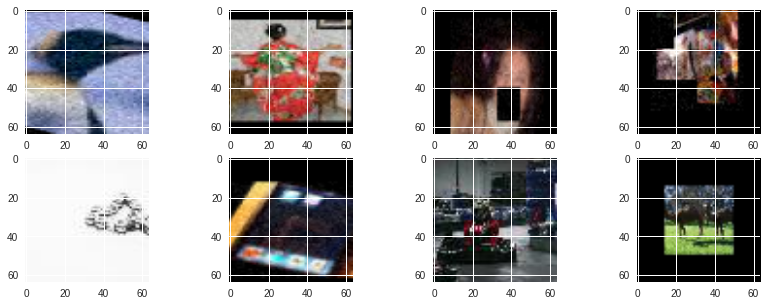

In [0]:
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='bilinear')

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_5.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_6.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 382s 2s/step - loss: 2.8627 - acc: 0.3569 - val_loss: 2.7110 - val_acc: 0.3952
Epoch 2/15
200/200 [==============================] - 360s 2s/step - loss: 2.6453 - acc: 0.3914 - val_loss: 2.4072 - val_acc: 0.4429
Epoch 3/15
200/200 [==============================] - 360s 2s/step - loss: 2.5821 - acc: 0.4111 - val_loss: 2.5396 - val_acc: 0.4261
Epoch 4/15
200/200 [==============================] - 359s 2s/step - loss: 2.5369 - acc: 0.4145 - val_loss: 2.5355 - val_acc: 0.4201
Epoch 5/15
200/200 [==============================] - 360s 2s/step - loss: 2.5000 - acc: 0.4201 - val_loss: 2.4054 - val_acc: 0.4378
Epoch 6/15
200/200 [==============================] - 360s 2s/step - loss: 2.4910 - acc: 0.4248 - val_loss: 2.3955 - val_acc: 0.4479
Epoch 7/15
200/200 [==============================] - 360s 2s/step - loss: 2.5049 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_6.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_7.h5')

Epoch 1/15
200/200 [==============================] - 365s 2s/step - loss: 2.3833 - acc: 0.4430 - val_loss: 2.2280 - val_acc: 0.4722
Epoch 2/15
200/200 [==============================] - 363s 2s/step - loss: 2.2865 - acc: 0.4653 - val_loss: 2.2960 - val_acc: 0.4679
Epoch 3/15
200/200 [==============================] - 363s 2s/step - loss: 2.2779 - acc: 0.4613 - val_loss: 2.3714 - val_acc: 0.4479
Epoch 4/15
200/200 [==============================] - 362s 2s/step - loss: 2.3223 - acc: 0.4541 - val_loss: 2.2054 - val_acc: 0.4766
Epoch 5/15
200/200 [==============================] - 362s 2s/step - loss: 2.3297 - acc: 0.4516 - val_loss: 2.2342 - val_acc: 0.4755
Epoch 6/15
200/200 [==============================] - 362s 2s/step - loss: 2.2897 - acc: 0.4607 - val_loss: 2.2915 - val_acc: 0.4648
Epoch 7/15
200/200 [==============================] - 361s 2s/step - loss: 2.3102 - acc: 0.4630 - val_loss: 2.2837 - val_acc: 0.4729
Epoch 8/15
200/200 [==============================] - 361s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_7.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_8.h5')

Epoch 1/15
200/200 [==============================] - 367s 2s/step - loss: 2.2663 - acc: 0.4680 - val_loss: 2.2842 - val_acc: 0.4758
Epoch 2/15
200/200 [==============================] - 362s 2s/step - loss: 2.1773 - acc: 0.4935 - val_loss: 2.2088 - val_acc: 0.4836
Epoch 3/15
200/200 [==============================] - 362s 2s/step - loss: 2.1583 - acc: 0.4919 - val_loss: 2.2170 - val_acc: 0.4787
Epoch 4/15
200/200 [==============================] - 362s 2s/step - loss: 2.1747 - acc: 0.4875 - val_loss: 2.2576 - val_acc: 0.4731
Epoch 5/15
200/200 [==============================] - 362s 2s/step - loss: 2.1979 - acc: 0.4864 - val_loss: 2.3209 - val_acc: 0.4617
Epoch 6/15
200/200 [==============================] - 362s 2s/step - loss: 2.1850 - acc: 0.4834 - val_loss: 2.2705 - val_acc: 0.4757
Epoch 7/15
200/200 [==============================] - 362s 2s/step - loss: 2.2168 - acc: 0.4771 - val_loss: 2.1889 - val_acc: 0.4821
Epoch 8/15
200/200 [==============================] - 362s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_8.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_9.h5')

Epoch 1/15
200/200 [==============================] - 366s 2s/step - loss: 2.1521 - acc: 0.4890 - val_loss: 2.1257 - val_acc: 0.5005
Epoch 2/15
200/200 [==============================] - 361s 2s/step - loss: 2.0982 - acc: 0.4981 - val_loss: 2.2512 - val_acc: 0.4745
Epoch 3/15
200/200 [==============================] - 362s 2s/step - loss: 2.0412 - acc: 0.5166 - val_loss: 2.4439 - val_acc: 0.4402
Epoch 4/15
200/200 [==============================] - 362s 2s/step - loss: 2.0843 - acc: 0.4982 - val_loss: 2.2887 - val_acc: 0.4633
Epoch 5/15
200/200 [==============================] - 362s 2s/step - loss: 2.0836 - acc: 0.5081 - val_loss: 2.1877 - val_acc: 0.4895
Epoch 6/15
200/200 [==============================] - 362s 2s/step - loss: 2.0756 - acc: 0.5077 - val_loss: 2.1564 - val_acc: 0.4969
Epoch 7/15
200/200 [==============================] - 363s 2s/step - loss: 2.1002 - acc: 0.5034 - val_loss: 2.2122 - val_acc: 0.4800
Epoch 8/15
200/200 [==============================] - 362s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_9.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_10.h5')

Epoch 1/15
200/200 [==============================] - 367s 2s/step - loss: 1.9811 - acc: 0.5243 - val_loss: 2.2030 - val_acc: 0.4866
Epoch 2/15
200/200 [==============================] - 362s 2s/step - loss: 1.9912 - acc: 0.5199 - val_loss: 2.1993 - val_acc: 0.4882
Epoch 3/15
200/200 [==============================] - 362s 2s/step - loss: 2.0057 - acc: 0.5184 - val_loss: 2.2174 - val_acc: 0.4799
Epoch 4/15
200/200 [==============================] - 362s 2s/step - loss: 2.0149 - acc: 0.5167 - val_loss: 2.3835 - val_acc: 0.4561
Epoch 5/15
200/200 [==============================] - 361s 2s/step - loss: 1.9944 - acc: 0.5245 - val_loss: 2.1740 - val_acc: 0.4949
Epoch 6/15
200/200 [==============================] - 361s 2s/step - loss: 1.9915 - acc: 0.5223 - val_loss: 2.1827 - val_acc: 0.4881
Epoch 7/15
200/200 [==============================] - 362s 2s/step - loss: 1.9763 - acc: 0.5294 - val_loss: 2.1332 - val_acc: 0.5010
Epoch 8/15
200/200 [==============================] - 362s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_10.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_11.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 368s 2s/step - loss: 1.8977 - acc: 0.5450 - val_loss: 2.0854 - val_acc: 0.5118
Epoch 2/15
200/200 [==============================] - 348s 2s/step - loss: 1.9261 - acc: 0.5409 - val_loss: 2.0325 - val_acc: 0.5218
Epoch 3/15
200/200 [==============================] - 347s 2s/step - loss: 1.9013 - acc: 0.5430 - val_loss: 2.0751 - val_acc: 0.5155
Epoch 4/15
200/200 [==============================] - 347s 2s/step - loss: 1.9180 - acc: 0.5359 - val_loss: 2.0963 - val_acc: 0.5062
Epoch 5/15
200/200 [==============================] - 347s 2s/step - loss: 1.9230 - acc: 0.5390 - val_loss: 2.0226 - val_acc: 0.5212
Epoch 6/15
200/200 [==============================] - 348s 2s/step - loss: 1.9247 - acc: 0.5320 - val_loss: 2.1358 - val_acc: 0.4959
Epoch 7/15
200/200 [==============================] - 346s 2s/step - loss: 1.9261 - acc: 0.5364 - val_loss: 2.2188 - val_acc: 0.4911
Epoch 8/15
200/200 [=

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_11.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1)

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_12.h5')

Epoch 1/15
200/200 [==============================] - 354s 2s/step - loss: 1.7889 - acc: 0.5675 - val_loss: 2.1402 - val_acc: 0.5017
Epoch 2/15
200/200 [==============================] - 347s 2s/step - loss: 1.8288 - acc: 0.5596 - val_loss: 2.0741 - val_acc: 0.5140
Epoch 3/15
200/200 [==============================] - 348s 2s/step - loss: 1.8203 - acc: 0.5613 - val_loss: 2.0446 - val_acc: 0.5251
Epoch 4/15
200/200 [==============================] - 348s 2s/step - loss: 1.8302 - acc: 0.5534 - val_loss: 2.1222 - val_acc: 0.5022
Epoch 5/15
200/200 [==============================] - 347s 2s/step - loss: 1.8313 - acc: 0.5544 - val_loss: 2.0407 - val_acc: 0.5227
Epoch 6/15
200/200 [==============================] - 348s 2s/step - loss: 1.8224 - acc: 0.5617 - val_loss: 2.0687 - val_acc: 0.5167
Epoch 7/15
200/200 [==============================] - 348s 2s/step - loss: 1.8544 - acc: 0.5559 - val_loss: 2.0957 - val_acc: 0.5150
Epoch 8/15
200/200 [==============================] - 346s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_12.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_13.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 390s 2s/step - loss: 1.6067 - acc: 0.6187 - val_loss: 2.0142 - val_acc: 0.5257
Epoch 2/15
200/200 [==============================] - 365s 2s/step - loss: 1.6079 - acc: 0.6155 - val_loss: 2.0256 - val_acc: 0.5267
Epoch 3/15
200/200 [==============================] - 365s 2s/step - loss: 1.5738 - acc: 0.6269 - val_loss: 2.0561 - val_acc: 0.5211
Epoch 4/15
200/200 [==============================] - 364s 2s/step - loss: 1.5915 - acc: 0.6181 - val_loss: 2.0679 - val_acc: 0.5176
Epoch 5/15
200/200 [==============================] - 365s 2s/step - loss: 1.5954 - acc: 0.6158 - val_loss: 1.9966 - val_acc: 0.5287
Epoch 6/15
200/200 [==============================] - 365s 2s/step - loss: 1.5931 - acc: 0.6189 - val_loss: 2.1341 - val_acc: 0.5026
Epoch 7/15
200/200 [==============================] - 365s 2s/step - loss: 1.5928 - acc: 0.6166 - val_loss: 2.1717 - val_acc: 0.5067
Epoch 8/15
200/200 [=

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_13.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_14.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
200/200 [==============================] - 380s 2s/step - loss: 1.2164 - acc: 0.7241 - val_loss: 1.8155 - val_acc: 0.5692
Epoch 2/15
200/200 [==============================] - 357s 2s/step - loss: 1.1886 - acc: 0.7307 - val_loss: 1.8174 - val_acc: 0.5707
Epoch 3/15
200/200 [==============================] - 357s 2s/step - loss: 1.1492 - acc: 0.7439 - val_loss: 1.8298 - val_acc: 0.5716
Epoch 4/15
200/200 [==============================] - 356s 2s/step - loss: 1.1399 - acc: 0.7462 - val_loss: 1.8449 - val_acc: 0.5670
Epoch 5/15
200/200 [==============================] - 357s 2s/step - loss: 1.1312 - acc: 0.7476 - val_loss: 1.8500 - val_acc: 0.5663
Epoch 6/15
200/200 [==============================] - 357s 2s/step - loss: 1.1073 - acc: 0.7575 - val_loss: 1.8488 - val_acc: 0.5644
Epoch 7/15
200/200 [==============================] - 357s 2s/step - loss: 1.1002 - acc: 0.7579 - val_loss: 1.7843 - val_acc: 0.5773
Epoch 8/15
200/200 [=

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_14.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_15.h5')

Epoch 1/15
200/200 [==============================] - 360s 2s/step - loss: 1.5404 - acc: 0.6245 - val_loss: 1.7478 - val_acc: 0.5865
Epoch 2/15
200/200 [==============================] - 358s 2s/step - loss: 1.4405 - acc: 0.6481 - val_loss: 1.7474 - val_acc: 0.5903
Epoch 3/15
200/200 [==============================] - 357s 2s/step - loss: 1.4057 - acc: 0.6598 - val_loss: 1.7395 - val_acc: 0.5904
Epoch 4/15
200/200 [==============================] - 358s 2s/step - loss: 1.4201 - acc: 0.6554 - val_loss: 1.7497 - val_acc: 0.5848
Epoch 5/15
200/200 [==============================] - 358s 2s/step - loss: 1.4346 - acc: 0.6535 - val_loss: 1.7248 - val_acc: 0.5938
Epoch 6/15
200/200 [==============================] - 359s 2s/step - loss: 1.3880 - acc: 0.6651 - val_loss: 1.7464 - val_acc: 0.5864
Epoch 7/15
200/200 [==============================] - 358s 2s/step - loss: 1.4110 - acc: 0.6619 - val_loss: 1.7356 - val_acc: 0.5902
Epoch 8/15
200/200 [==============================] - 359s 2s/step - 

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_15.h5')

model.fit_generator(train_generator, epochs=15, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_16.h5')

Epoch 1/15
200/200 [==============================] - 363s 2s/step - loss: 1.4273 - acc: 0.6569 - val_loss: 1.7375 - val_acc: 0.5905
Epoch 2/15
200/200 [==============================] - 357s 2s/step - loss: 1.4040 - acc: 0.6619 - val_loss: 1.7232 - val_acc: 0.5896
Epoch 3/15
200/200 [==============================] - 358s 2s/step - loss: 1.3838 - acc: 0.6679 - val_loss: 1.7398 - val_acc: 0.5878
Epoch 4/15
200/200 [==============================] - 358s 2s/step - loss: 1.3816 - acc: 0.6665 - val_loss: 1.7201 - val_acc: 0.5927
Epoch 5/15
200/200 [==============================] - 359s 2s/step - loss: 1.3995 - acc: 0.6627 - val_loss: 1.7309 - val_acc: 0.5943
Epoch 6/15
200/200 [==============================] - 358s 2s/step - loss: 1.4008 - acc: 0.6628 - val_loss: 1.7266 - val_acc: 0.5897
Epoch 7/15
200/200 [==============================] - 358s 2s/step - loss: 1.4042 - acc: 0.6602 - val_loss: 1.7276 - val_acc: 0.5918
Epoch 8/15
200/200 [==============================] - 358s 2s/step - 

In [0]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EIP Models/{epoch:02d}-{val_acc:.2f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_16.h5')

model.fit_generator(train_generator, epochs=10, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator, verbose=1, callbacks=[lr_reducer, checkpoint])

model.save('/content/drive/My Drive/Colab Notebooks/EIP Models/Exp_25_17.h5')

Epoch 1/10
200/200 [==============================] - 365s 2s/step - loss: 1.4030 - acc: 0.6616 - val_loss: 1.7339 - val_acc: 0.5916

Epoch 00001: val_acc improved from -inf to 0.59159, saving model to /content/drive/My Drive/Colab Notebooks/EIP Models/01-0.59.hdf5
Epoch 2/10
200/200 [==============================] - 359s 2s/step - loss: 1.3881 - acc: 0.6642 - val_loss: 1.7303 - val_acc: 0.5899

Epoch 00002: val_acc did not improve from 0.59159
Epoch 3/10
200/200 [==============================] - 359s 2s/step - loss: 1.3769 - acc: 0.6645 - val_loss: 1.7168 - val_acc: 0.5929

Epoch 00003: val_acc improved from 0.59159 to 0.59288, saving model to /content/drive/My Drive/Colab Notebooks/EIP Models/03-0.59.hdf5
Epoch 4/10
200/200 [==============================] - 359s 2s/step - loss: 1.3691 - acc: 0.6767 - val_loss: 1.7424 - val_acc: 0.5885

Epoch 00004: val_acc did not improve from 0.59288
Epoch 5/10
200/200 [==============================] - 359s 2s/step - loss: 1.3985 - acc: 0.6605 -

#Model Evaluation

In [0]:
valid_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=64, shuffle=True, seed=42)

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EIP Models/08-0.59.hdf5')

validation_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

score = model.evaluate_generator(validation_generator, verbose=1, steps=validation_steps_per_epoch)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 71s 449ms/step
Test loss: 1.7169813255310058
Test accuracy: 0.595
